In [ ]:
!pwd
from einops import rearrange, reduce, repeat

/content


In [ ]:
!git clone https://github.com/arogozhnikov/einops.git

Cloning into 'einops'...
remote: Enumerating objects: 1295, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 1295 (delta 29), reused 25 (delta 12), pack-reused 1229
Receiving objects: 100% (1295/1295), 1.64 MiB | 8.00 MiB/s, done.
Resolving deltas: 100% (736/736), done.


In [ ]:
cd /content/einops/docs

/content/einops/docs


In [ ]:
!ls

1-einops-basics.ipynb		  css			 README.md	  utils
2-einops-for-deep-learning.ipynb  index.md		 resources
api				  pytorch-examples.html  source_examples


In [ ]:
import numpy
from utils import display_np_arrays_as_images
display_np_arrays_as_images()

In [ ]:
ims = numpy.load('./resources/test_images.npy', allow_pickle=False)
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


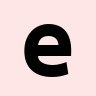

In [ ]:
ims[0]

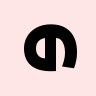

In [ ]:
rearrange(ims[0], 'h w c -> w h c')

(576, 96, 3) float64


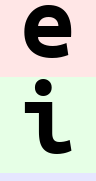

In [ ]:
ims1 =  rearrange(ims, 'b h w c -> (b h) w c')

print(ims1.shape, ims1.dtype)
ims1[19: 200]

(96, 576, 3) float64


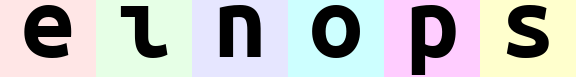

In [ ]:
ims2 =  rearrange(ims, 'b h w c -> h (b w) c')

print(ims2.shape, ims2.dtype)
ims2[19: 200]

In [ ]:
ims3 = rearrange(ims, 'b h w c -> (b h w c)')
ims3.shape

(165888,)

In [ ]:
rearrange(ims, '(b1 b2) h w c -> b1 b2 h w c ', b1=2)

<array of shape (2, 3, 96, 96, 3)>


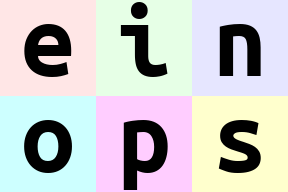

In [ ]:
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c ', b1=2)

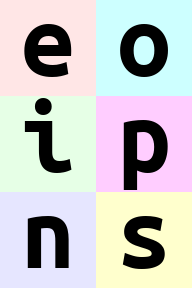

In [ ]:
rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2)

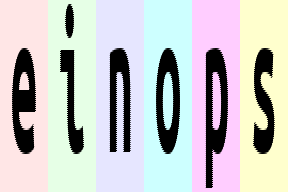

In [ ]:
rearrange(ims, 'b h (w w2) c -> (h w2) (b w) c', w2=2)
#在x轴上，由于图像的连续性看起来被拉伸。

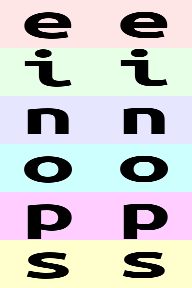

In [ ]:
rearrange(ims, 'b (h h1) w c -> (b h) (h1 w) c', h1=2)

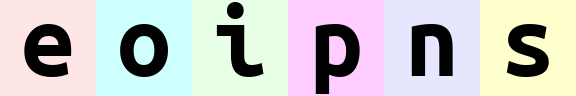

In [ ]:
rearrange(ims, '(b1 b2) h w c -> h (b2 b1 w) c ', b1=2)

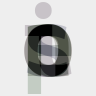

In [ ]:
reduce(ims, 'b h w c -> h w c', 'mean')

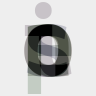

In [ ]:
ims.mean(axis=0)

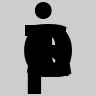

In [ ]:
reduce(ims, 'b h w c -> h w', 'min')

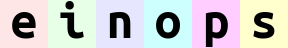

In [ ]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2)

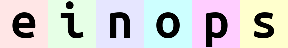

In [ ]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'max', h2=2, w2=2)

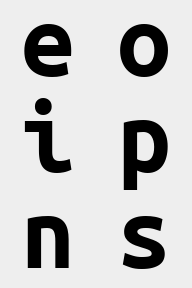

In [ ]:
reduce(ims, '(b1 b2) h w c -> (b2 h) (b1 w)', 'mean', b1=2)